In [3]:
import pandas as pd
import os
import numpy as np
import sklearn.cluster as sk_cluster
import sklearn.preprocessing as sk_preprocessing
import matplotlib.pyplot as plt

In [10]:
data_dir = './harth'

concat = pd.DataFrame()
for root, _, files in os.walk(data_dir):
    for file in files:
        new = pd.read_csv(os.path.join(root, file), index_col = 'timestamp')
        file_name = os.path.splitext(file)[0]
        new['file_name'] = file_name
        concat = pd.concat([concat, new])
concat.reset_index(inplace = True)
concat['timestamp'] = pd.to_datetime(concat['timestamp']).apply(lambda x: x.timestamp())
time = concat['timestamp']

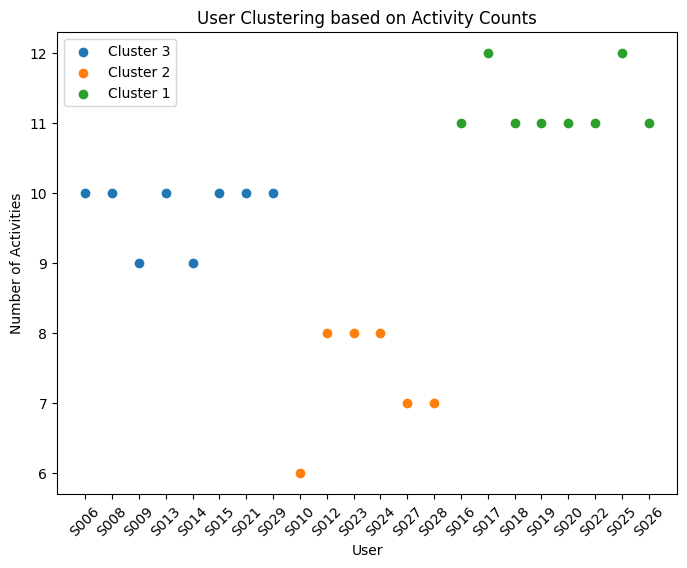

In [12]:
user_activity_counts = concat.groupby('file_name')['label'].nunique().reset_index()

scaler = sk_preprocessing.StandardScaler()
X = scaler.fit_transform(user_activity_counts[['label']])
kmeans = sk_cluster.KMeans(n_clusters=3, random_state=42)
user_activity_counts['cluster'] = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
for cluster_label in user_activity_counts['cluster'].unique():
    cluster_data = user_activity_counts[user_activity_counts['cluster'] == cluster_label]
    plt.scatter(cluster_data['file_name'], cluster_data['label'], label=f'Cluster {cluster_label + 1}')

plt.xlabel('User')
plt.ylabel('Number of Activities')
plt.title('User Clustering based on Activity Counts')
plt.xticks(rotation=45)
plt.legend()
plt.show()

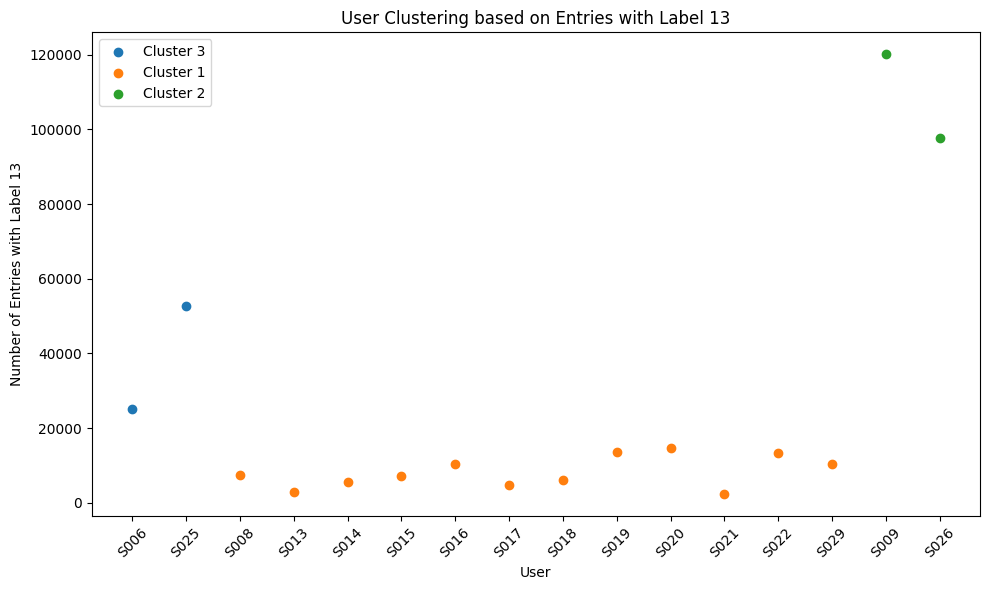

In [13]:
count_13 = concat[concat['label'] == 13].groupby('file_name')['label'].count().reset_index()
count_13.columns = ['file_name', 'count_13']

# Standardize the count data
scaler = sk_preprocessing.StandardScaler()
X = scaler.fit_transform(count_13[['count_13']])

# Perform KMeans clustering
kmeans = sk_cluster.KMeans(n_clusters=3, random_state=42)
count_13['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in count_13['cluster'].unique():
    cluster_data = count_13[count_13['cluster'] == cluster_label]
    plt.scatter(cluster_data['file_name'], cluster_data['count_13'], label=f'Cluster {cluster_label + 1}')

plt.xlabel('User')
plt.ylabel('Number of Entries with Label 13')
plt.title('User Clustering based on Entries with Label 13')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()